<a href="https://colab.research.google.com/github/rigolabbe/desafioLATAMg69/blob/main/Desafio_Regresion_Lineal_G69_RAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
data= pd.read_csv('/content/sample_data/Fish.csv');
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [11]:
data.dropna()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [12]:
data.drop_duplicates()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un
cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr²,
donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos
bases circulares.


In [14]:
# Se calcula el ratio que es el ancho del  pez dividido por 2
data['Radius'] = data['Width'] / 2

# Se calcula  la altura o longitud promedio del pez
data['Height'] = (data['Length1'] + data['Length2'] + data['Length3']) / 3

# Se calcula el  volumen usando la fórmula del cilindro
# V = π * r² * h
data['Volume'] = np.pi * data['Radius'] ** 2 * data['Height']

# Mostrar las primeras filas del DataFrame con la nueva columna "Volume"
data


,Species,Weight,Length1,Length2,Length3,Height,Width,Radius,Volume
0,Bream,242.0,23.2,25.4,30.0,26.200000,4.0200,2.01000,332.539530
1,Bream,290.0,24.0,26.3,31.2,27.166667,4.3056,2.15280,395.542903
2,Bream,340.0,23.9,26.5,31.1,27.166667,4.6961,2.34805,470.544724
3,Bream,363.0,26.3,29.0,33.5,29.600000,4.4555,2.22775,461.502957
4,Bream,430.0,26.5,29.0,34.0,29.833333,5.1340,2.56700,617.594459
...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,12.366667,1.3936,0.69680,18.863350
155,Smelt,13.4,11.7,12.4,13.5,12.533333,1.2690,0.63450,15.851841
156,Smelt,12.2,12.1,13.0,13.8,12.966667,1.2558,0.62790,16.060505
157,Smelt,19.7,13.2,14.3,15.2,14.233333,2.0672,1.03360,47.770688


2. Verifica la correlación posible entre las variables, numérica y gráficamente.
¿Aumenta la correlación al añadir el volumen? Explica.

In [17]:


# Calcular la correlación entre las variables originales
corre_ori = data[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']].corr()

# Calcular la correlación añadiendo la columna "Volume"
corre_vol = data[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Volume']].corr()

# Mostrar correlación original
print("Correlación entre las variables originales:")
print(corre_ori)

# Mostrar correlación con la columna "Volume"
print("Correlación añadiendo la variable 'Volume':")
print(corre_vol)




Correlación entre las variables originales:
           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.920817  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.998614  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.999370  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.997214  0.878520
Height   0.920817  0.998614  0.999370  0.997214  1.000000  0.874757
Width    0.886507  0.867050  0.873547  0.878520  0.874757  1.000000
Correlación añadiendo la variable 'Volume':
           Weight   Length1   Length2   Length3    Height     Width    Volume
Weight   1.000000  0.915712  0.918618  0.923044  0.920817  0.886507  0.961164
Length1  0.915712  1.000000  0.999517  0.992031  0.998614  0.867050  0.891354
Length2  0.918618  0.999517  1.000000  0.994103  0.999370  0.873547  0.892429
Length3  0.923044  0.992031  0.994103  1.000000  0.997214  0.878520  0.882504
Height   0.920817  0.998614  0.999370  0.99721

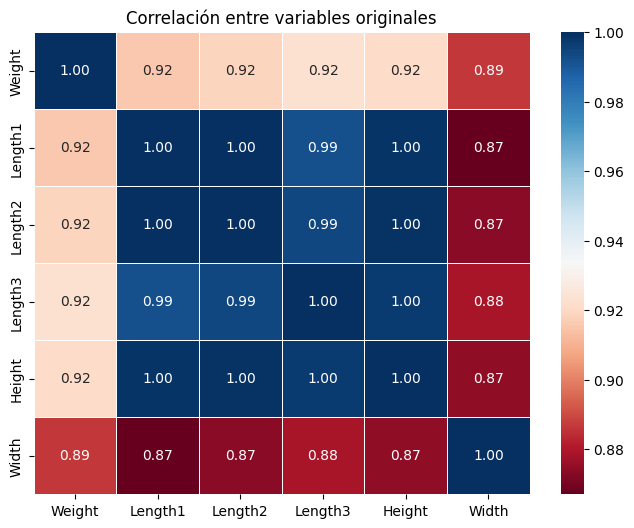

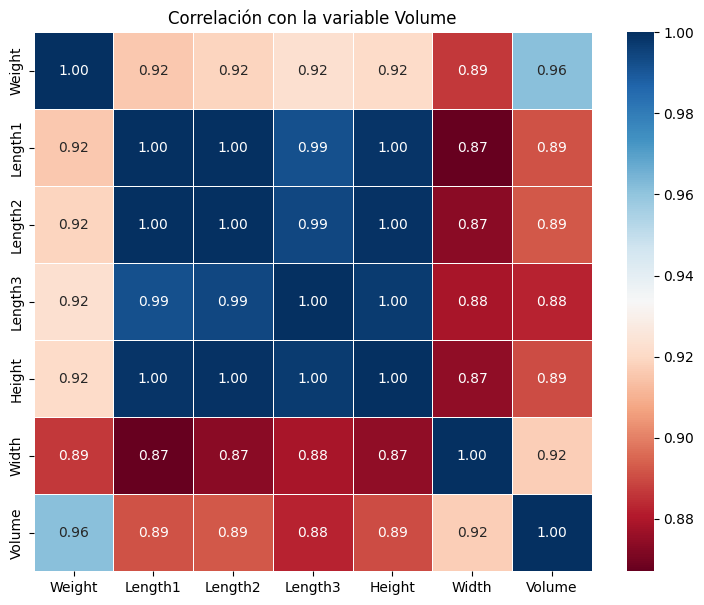

In [22]:

# grafica para la correlacion original
# annot para ver colores
#cmap paleta de colores

plt.figure(figsize=(8, 6))
sns.heatmap(corre_ori, annot=True, cmap='RdBu', fmt=".2f", linewidths=.5)
plt.title("Correlación entre variables originales")
plt.show()

# grafica para la correlación con la columna Volume
plt.figure(figsize=(9, 7))
sns.heatmap(corre_vol, annot=True, cmap='RdBu', fmt=".2f", linewidths=.5)
plt.title("Correlación con la variable Volume")
plt.show()


# CONCLUSION : Los datos muestran que existe una correlacion entre el peso y el volumen ,
# el cilindro utilizado  en el calculo para las diemnsiones del pez proporciona informacion
# que nos ayudara a predeCir el peso dependiendo del diemmsiones del pez




3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los
peces. Realiza una breve evaluación del modelo y grafícalo.


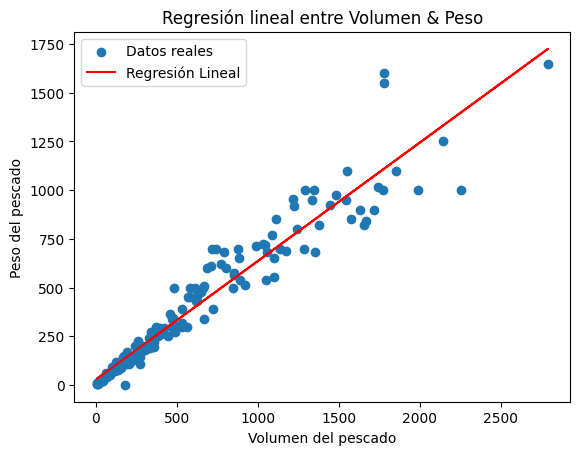

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1904.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.09e-89
Time:                        23:06:49   Log-Likelihood:                -955.40
No. Observations:                 159   AIC:                             1915.
Df Residuals:                     157   BIC:                             1921.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8283     11.587      2.315      0.0

In [23]:

# Se definenn las variables para predecir (X) y la variable de respuesta (y)
X = data["Volume"]
y = data["Weight"]

# Se agrega la constante al predictor (la intercepcion)
X = sm.add_constant(X)

# Se crea modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Graficar la regresión lineal
plt.scatter(data["Volume"], data["Weight"], label="Datos reales")
plt.plot(data["Volume"], model.predict(X), color='red', label="Regresión Lineal")
plt.title("Regresión lineal entre Volumen & Peso")
plt.xlabel("Volumen del pescado")
plt.ylabel("Peso del pescado")
plt.legend()
plt.show()

print(model.summary())

El coeficiente de determinación es 0.924 (muy cercano a 1), lo que significa que aproximadamente el 92.4% de la variabilidad en el peso de los peces  por lo tanto explica la variable de Volumen,  por lo tanto existe una relacion entre volumen del pez y su peso.

Coeficiente para Volume: El coeficiente para la variable Volume es 0.6090. Esto implica que en promedio, por cada unidad de aumento en el volumen del pez, el peso aumenta en 0.6090 .

Significancia Estadística: El valor p asociado con la variable Volume es muy cercano a cero (0.000), lo que indica que la relación entre Volume y Weight es estadísticamente significativa.

Intercepto: El modelo incluye un término constante (intercepto) de 26.8283. Este valor representa el peso estimado del pez cuando el volumen es cero. Sin embargo, en el contexto de este problema, el valor del intercepto puede no tener un significado práctico relevante.

En resumen, el modelo de regresión lineal simple proporciona una buena aproximación para predecir el peso de los peces basándose únicamente en su volumen

4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces?
Explica.

Resultados del modelo para la especie: Bream
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     268.9
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.00e-17
Time:                        23:39:50   Log-Likelihood:                -197.43
No. Observations:                  35   AIC:                             398.9
Df Residuals:                      33   BIC:                             402.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

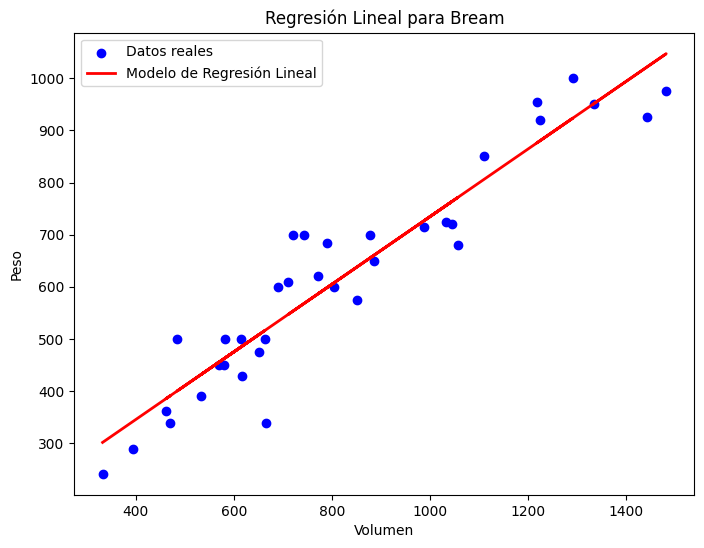

Resultados del modelo para la especie: Roach
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           4.18e-10
Time:                        23:39:50   Log-Likelihood:                -95.421
No. Observations:                  20   AIC:                             194.8
Df Residuals:                      18   BIC:                             196.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

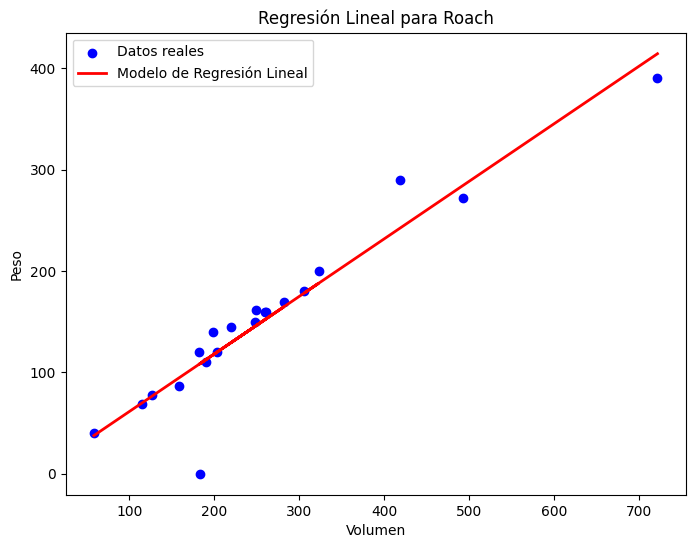

Resultados del modelo para la especie: Whitefish
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     46.29
Date:                Mon, 12 Feb 2024   Prob (F-statistic):            0.00244
Time:                        23:39:50   Log-Likelihood:                -34.784
No. Observations:                   6   AIC:                             73.57
Df Residuals:                       4   BIC:                             73.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


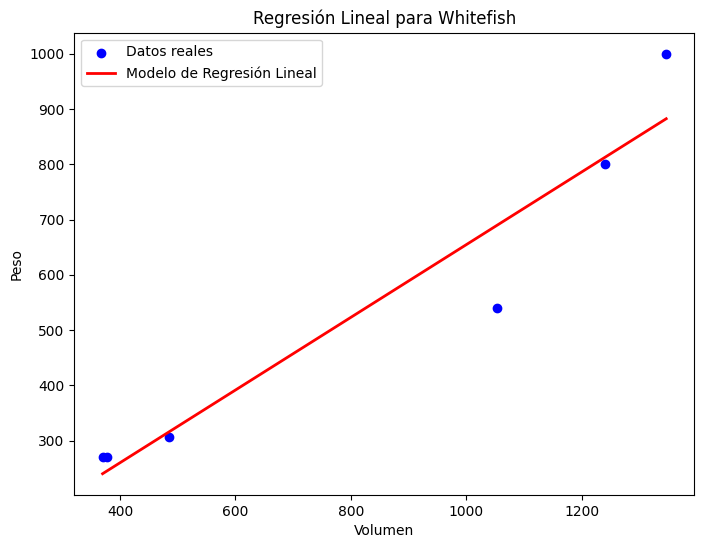

Resultados del modelo para la especie: Parkki
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1561.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           2.12e-11
Time:                        23:39:51   Log-Likelihood:                -34.725
No. Observations:                  11   AIC:                             73.45
Df Residuals:                       9   BIC:                             74.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


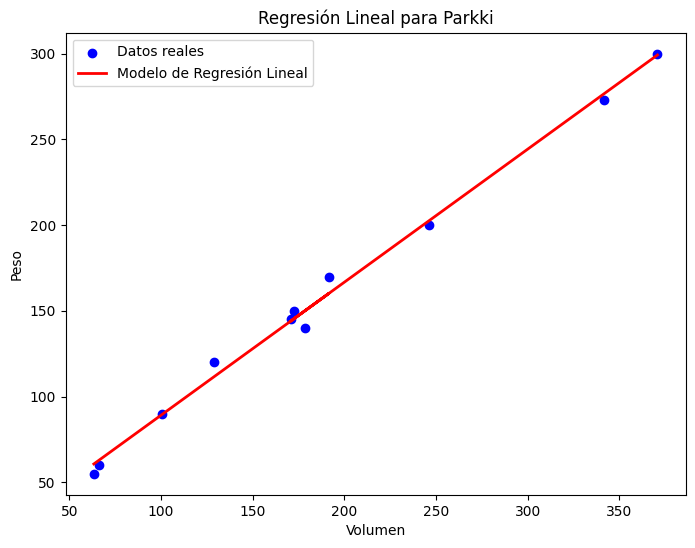

Resultados del modelo para la especie: Perch
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1942.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           5.15e-44
Time:                        23:39:51   Log-Likelihood:                -305.54
No. Observations:                  56   AIC:                             615.1
Df Residuals:                      54   BIC:                             619.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

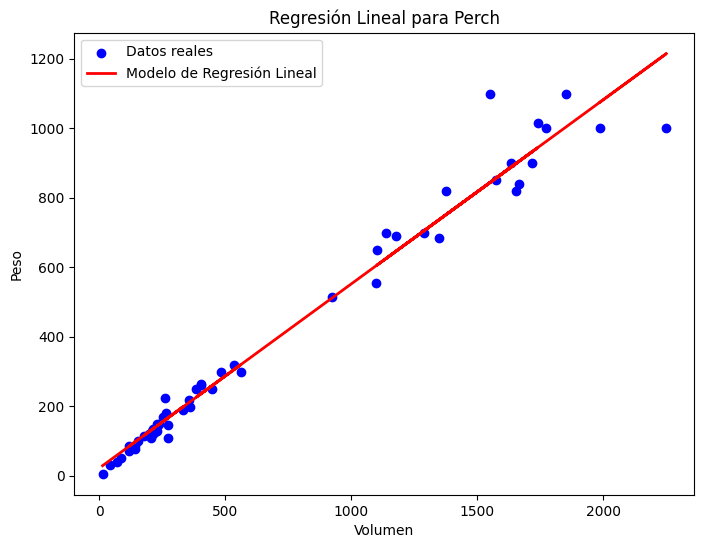

Resultados del modelo para la especie: Pike
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           8.01e-09
Time:                        23:39:51   Log-Likelihood:                -109.68
No. Observations:                  17   AIC:                             223.4
Df Residuals:                      15   BIC:                             225.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


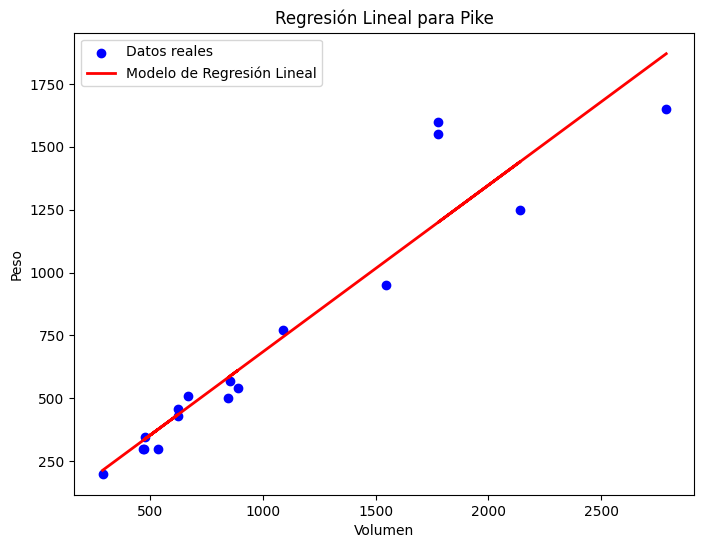

Resultados del modelo para la especie: Smelt
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     92.20
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           5.54e-07
Time:                        23:39:52   Log-Likelihood:                -24.078
No. Observations:                  14   AIC:                             52.16
Df Residuals:                      12   BIC:                             53.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


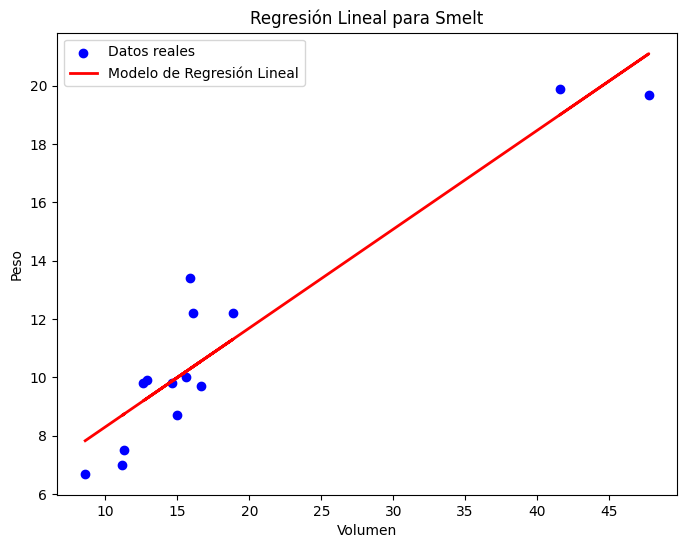

Errores Cuadráticos Medios para cada especie:
{'Bream': 4647.354879671123, 'Roach': 815.8150684813899, 'Whitefish': 6353.193738251478, 'Parkki': 32.32106619737396, 'Perch': 3211.2984598935445, 'Pike': 23526.054839482513, 'Smelt': 1.8253554993320444}


In [27]:
# Separar las  especies
especies = data['Species'].unique()

# Diccionario para los modelos y errores
modelos = {}
errores = {}

# Aplicar el modelo por separado a cada especie
for especie in especies:
    # Filtrar datos para la especie actual
    dat_esp = data[data['Species'] == especie]

    # Definir variables predictoras (X) y variable de respuesta (y)
    X = dat_esp['Volume']
    y = dat_esp['Weight']

    # Agregar una constante al predictor (intercepto)
    X = sm.add_constant(X)

    # Crear y ajustar el modelo de regresión lineal
    modelo = sm.OLS(y, X).fit()

    # Almacenar el modelo en el diccionario
    modelos[especie] = modelo

    # Imprimir el resumen del modelo
    print(f"Resultados del modelo para la especie: {especie}")
    print(modelo.summary())

    # Calcular el Error Cuadrático Medio (MSE)
    predicciones = modelo.predict(X)
    mse = ((y - predicciones) ** 2).mean()
    errores[especie] = mse

    # Graficar el modelo
    plt.figure(figsize=(8, 6))
    plt.scatter(X['Volume'], y, color='blue', label='Datos reales')
    plt.plot(X['Volume'], modelo.predict(X), color='red', linewidth=2, label='Modelo de Regresión Lineal')
    plt.xlabel('Volumen')
    plt.ylabel('Peso')
    plt.title(f'Regresión Lineal para {especie}')
    plt.legend()
    plt.show()

# Imprimir los errores
print("Errores Cuadráticos Medios para cada especie:")
print(errores)

Errores Cuadráticos Medios para Cada Especie de Pez:

Los errores cuadráticos medios (MSE) indican cuán bien se ajusta el modelo de regresión lineal simple a los datos de cada especie en términos del peso del pez y su volumen.

Valores más bajos de MSE indican un mejor ajuste del modelo a los datos, por lo tanto :

Bream: 4647.35 no se ajusta al modelo, es menos preciso para esta especie
Roach: 815.82 se ajusta bien al  modelo
Whitefish: 6353.19
Parkki: 32.32  se ajusta bien al  modelo
Perch: 3211.30 no se ajusta al modelo, es menos preciso para esta especie
Pike: 23526.05  no se ajusta al modelo, es menos preciso para esta especie
Smelt: 1.83 se ajusta bien al  modelo

5. Construye un modelo de regresión que relacione dos o más variables con el peso de
los peces. Realiza una breve evaluación del modelo.


                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     812.1
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          3.41e-108
Time:                        23:38:09   Log-Likelihood:                -896.51
No. Observations:                 159   AIC:                             1805.
Df Residuals:                     153   BIC:                             1823.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -74.5659     28.403     -2.625      0.0

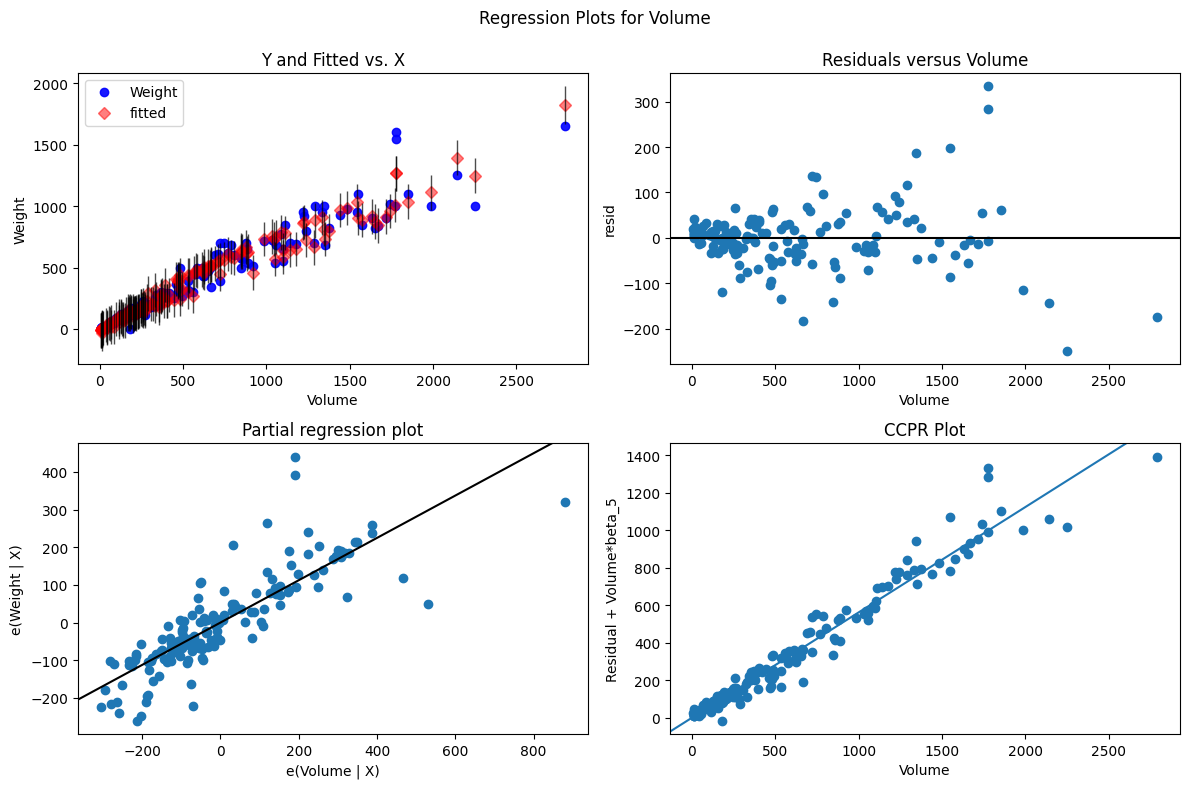

In [26]:
# Se definen las variables predictoras (X) y de respuesta (y)
X = data[['Length1', 'Length2', 'Length3', 'Width', 'Volume']]
y = data['Weight']

# Se agrega constante al predictor (intercepto)
X = sm.add_constant(X)

# Se crea el modelo de regresión lineal múltiple
modelo = sm.OLS(y, X).fit()

# Se imprime el resumen del modelo
print(modelo.summary())

# Se grafica eñl modelo
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(modelo, 'Volume', fig=fig)
plt.show()

El coeficiente de determinación es 0.964, lo que significa que aproximadamente el 96.4% de la variabilidad en el peso de los peces puede explicarse por las variables predictoras incluidas en el modelo. Esto indica una relación mentre las variables predictoras y el peso de los peces.

Significancia Estadística: La mayoría de las variables predictoras son estadísticamente significativas en el modelo. Sin embargo, Length2 no es significativa, lo que sugiere que no contribuye significativamente a explicar la variabilidad en el peso.

Intercepto: El modelo incluye un término constante (intercepto) de -74.57. Este valor representa el peso estimado del pez cuando todas las variables predictoras son cero. En el contexto de este problema, el valor del intercepto puede no tener un significado práctico relevante debido a las características biológicas de los peces.

Multicolinealidad: El modelo indica que podría haber multicolinealidad, lo que significa que algunas variables predictoras podrían estar altamente correlacionadas entre sí. Esto puede afectar la interpretación de los coeficientes individuales.

En resumen, el modelo de regresión lineal múltiple proporciona una excelente aproximación para predecir el peso de los peces basándose en las dimensiones físicas y el volumen. La relación es positiva para las dimensiones Length3 y Volume, y negativa para Length1 y Width. La variable Length2 no parece ser relevante en este contexto.